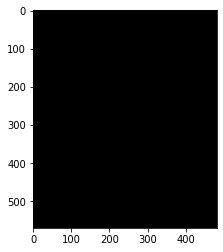

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = 'Fig0304(a)(breast_digital_Xray).tif'
original_image = cv2.imread(path)
plt.imshow(original_image)

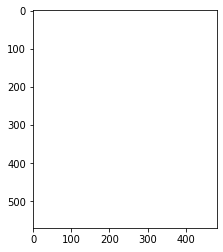

In [8]:
L = 256
negative_image = L - 1 - original_image
plt.imshow(negative_image)

Log Transformation
The general form of the log transformation is;

s = c . log(1 + r)

where c is a constant value.

Original Image

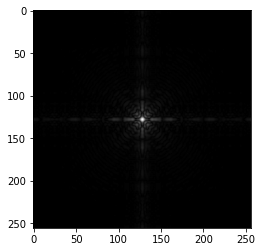

In [9]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
path = 'Fig0305(a)(DFT_no_log).tif'
original_image = cv2.imread(path)
plt.imshow(original_image) 

After Log Transformation

<ipython-input-10-4405d64c4c67>:4: RuntimeWarning: divide by zero encountered in log
  log_image[x,y] = 45 * np.log( original_image[x,y])
<ipython-input-10-4405d64c4c67>:4: RuntimeWarning: invalid value encountered in cast
  log_image[x,y] = 45 * np.log( original_image[x,y])


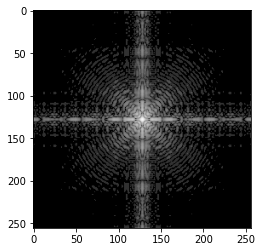

In [10]:
log_image = np.zeros_like(original_image, dtype = original_image.dtype)
for x in range(original_image.shape[0]):
  for y in range(original_image.shape[1]):
    log_image[x,y] = 45 * np.log( original_image[x,y])
plt.imshow(log_image)

Power Law (Gamma) Transformation
Power Law transformation have the form

s = c r^gamma

where c and gamma are positive constants.

Original Image

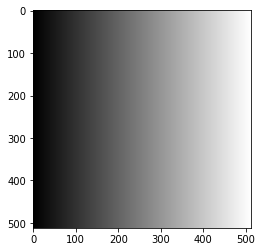

In [21]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
original_image = cv2.imread("Fig0307(a)(intensity_ramp).tif")
plt.imshow(original_image)

Now put c = 255 and gamma of 2.5 and we get the image;

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


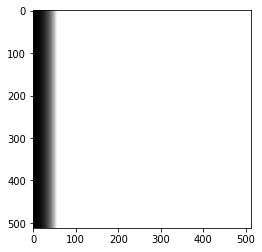

In [24]:
c, gamma = 255, 2.5
transformed_image = c * ((original_image/255)**gamma)
plt.imshow(transformed_image)

Now put gamma = 1/2.5 = 0.4

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


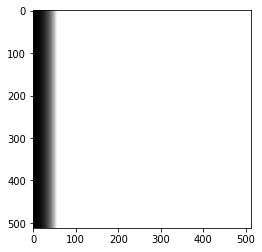

In [26]:
gamma = 0.4
tranformed_image = c * ((original_image/255)**gamma)
plt.imshow(transformed_image)

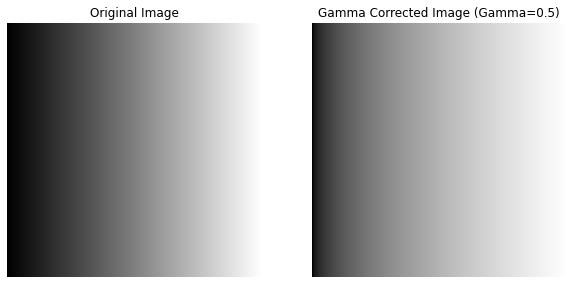

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def gamma_correction(image, gamma=1.0, c=1.0):
    # Apply gamma correction: g(x, y) = c * [f(x, y)]^gamma
    # Ensure the input image is in floating-point format
    image = image.astype(np.float32) / 255.0
    
    # Apply gamma transformation
    corrected_image = c * np.power(image, gamma)
    
    # Clip the values to be in the valid range [0, 255]
    corrected_image = np.clip(corrected_image * 255.0, 0, 255).astype(np.uint8)
    
    return corrected_image

# Load an image (replace 'input_image.jpg' with your image file)
input_image = cv2.imread('Fig0307(a)(intensity_ramp).tif', cv2.IMREAD_GRAYSCALE)

# Define gamma value (adjust as needed, gamma > 1 for darkening, gamma < 1 for brightening)
gamma_value = 0.5

# Define scaling factor (adjust as needed, higher values increase brightness)
scaling_factor = 1.0

# Apply gamma correction
output_image = gamma_correction(input_image, gamma=gamma_value, c=scaling_factor)

# Display the original and corrected images using matplotlib
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB))
plt.title('Gamma Corrected Image (Gamma={})'.format(gamma_value))
plt.axis('off')

plt.show()


Example of the contrast enhancement using power-law intensity transformation

Original Image

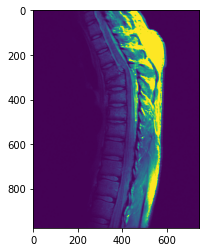

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
original_image = cv2.imread("Fig0308(a)(fractured_spine).tif")
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(original_image)

Now put gamma equal to 0.6 and look how the detail are clear.

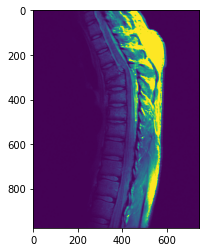

In [54]:

gamma = 0.6
c = 255
tranformed_image = c * (original_image/255 ** gamma)
tranformed_image.astype(np.float32)
plt.imshow(tranformed_image)

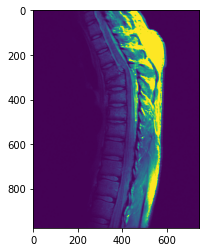

In [55]:
gamma = 0.3
c = 255
tranformed_image = c * (original_image/255 ** gamma)
tranformed_image.astype(np.float32)
plt.imshow(tranformed_image)

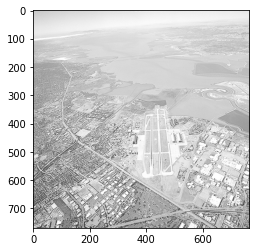

In [63]:
original_image = cv2.imread("Fig0309(a)(washed_out_aerial_image).tif")
#original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
plt.imshow(original_image)

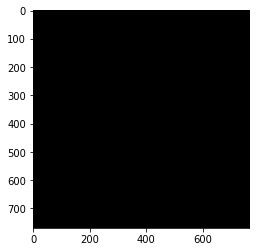

In [66]:
gamma = 3
c = 255
tranformed_image = c * (original_image/255 ** gamma)
tranformed_image.astype(np.float32)
plt.imshow(tranformed_image)

Contrast Stretching
Contrast stretching expands the range of intensity levels in an image so that it spans the ideal full intensity range of the recording medium or display device.

General form of the contrast sretching is;

s(r)=(L-1/rmax-rmin)⋅(r-rmin)

Original Image:

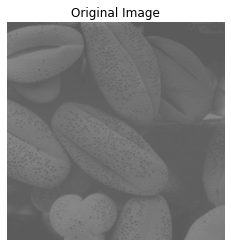

In [70]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
path = 'Fig0310(b)(washed_out_pollen_image).tif'
original_image = cv2.imread(path)
original_image_rgb = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)
plt.imshow(original_image_rgb)
plt.title('Original Image')  # Optional: Add a title to the plot
plt.axis('off')  # Optional: Turn off axis
plt.show()

Now apply contrast stretching



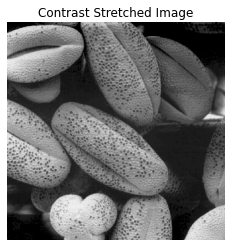

In [76]:
min_val = np.min(original_image_rgb)
max_val = np.max(original_image_rgb)

# Apply contrast stretching formula to transform pixel values
transformed_image = (255 / (max_val - min_val)) * (original_image_rgb - min_val)
transformed_image = transformed_image.astype(np.uint8)  # Convert to uint8 for display

# Display the transformed image using matplotlib
plt.imshow(transformed_image)
plt.title('Contrast Stretched Image')
plt.axis('off')  # Turn off axis
plt.show()

Threshold tranformation function for a binary image

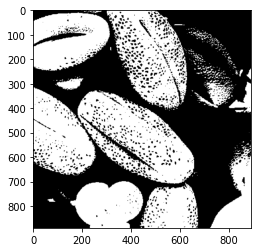

In [83]:
m = np.mean(original_image_rgb)
threshold_1 = original_image_rgb > 109# use m instead of 109
threshold_0 = original_image_rgb < 109
transformed_image = np.zeros_like(original_image_rgb, dtype = original_image_rgb.dtype)
transformed_image[threshold_1] = 255
transformed_image[threshold_0] = 0
plt.imshow(transformed_image)

Intensity-Level Slicing:
Original Image

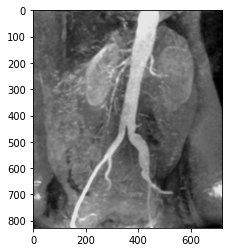

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
path = 'Fig0312(a)(kidney).tif'
original_image=cv2.imread(path)
plt.imshow(original_image)

Now Use thresholding to create binary image Binary Image

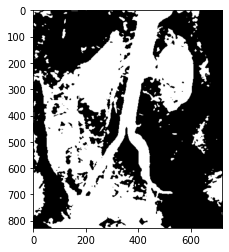

In [4]:
mean = np.uint8(np.mean(original_image))
threshold = original_image > mean
binary_image = np.zeros_like(original_image)
binary_image[threshold] = 255
plt.imshow(binary_image)

Now implement intensity level slicing in specific location in image....

Intensity Level Slicing

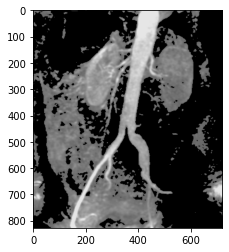

In [6]:
threshold = original_image < mean
slicing_image = np.copy(original_image)
slicing_image[threshold] = 0
plt.imshow(slicing_image)

Bit-Plane Slicing:
For an 8-bit image, a pixel value of 0 is represented as 00000000 in binary form and 255 is encoded as 11111111. Here, the leftmost bit is known as the most significant bit (MSB) as it contributes the maximum. e.g. if MSB of 11111111 is changed to 0 (i.e. 01111111), then the value changes from 255 to 127. Similarly, rightmost bit is known as Least significant bit (LSB).

In Bit-plane slicing, we divide the image into bit planes. This is done by first converting the pixel values in the binary form and then dividing it into bit planes. Let’s see by an example.

Converting Original Image to its nth-bit plane

Original_image

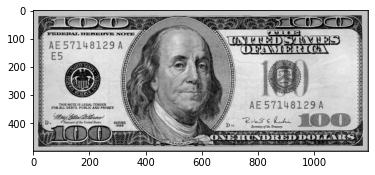

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
original_image = cv2.imread('Fig0314(a)(100-dollars).tif')
plt.imshow(original_image)

Now first Iterate over each pixel and change pixel value 
to binary using np.binary_repr() and store it in a list.
We have a list of strings where each string represents binary pixel value.
To extract bit planes we need to iterate over the strings and store the characters
corresponding to bit planes into lists. Multiply with 2^(n-1) and reshape to reconstruct the bit image.

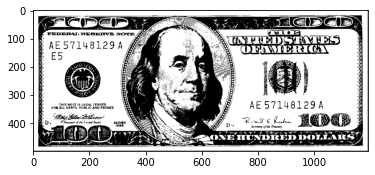

In [37]:
binary_pixels = []
for row in range(original_image.shape[0]):
  for col in range(original_image.shape[1]):
    binary_pixels.append(np.binary_repr(original_image[row][col], width = 8))
def const_bit_img(bit_no):
  return (np.array([int(bit[7 - (bit_no-1)]) for bit in binary_pixels],dtype = np.uint8) * 2**(bit_no-1) ).reshape(original_image.shape[0],original_image.shape[1])
bit_plane_8 = (const_bit_img(8))
plt.imshow(bit_plane_8, cmap='gray')
plt.show()

Bit-7 plane Image Now we will construct bit 7 image

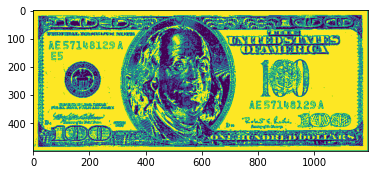

In [39]:
plt.imshow(const_bit_img(7))

And for bit 6,5,4,3,2 and 1

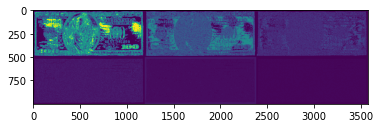

In [41]:
bits_img = []
for i in range(6,0,-1):
  bits_img.append(const_bit_img(i))
final1 = cv2.hconcat(bits_img[0:3])
final2 = cv2.hconcat(bits_img[3:])
final = cv2.vconcat([final1,final2])
plt.imshow(final)

Now reconstruct image from bit 8 and 7

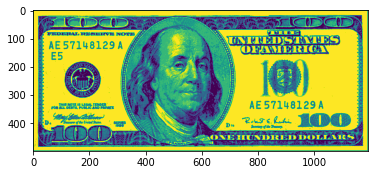

In [42]:
def reconst_bit_img(bit_no):
  return (np.array([int(bit[7 - (bit_no-1)]) for bit in binary_pixels],dtype = np.uint8) * 2**(bit_no-1) ).reshape(original_image.shape[0],original_image.shape[1])
bit8 = reconst_bit_img(8)
bit7 = reconst_bit_img(7)
rec_img87 = bit8 + bit7
plt.imshow(rec_img87)

And from bit plane 8,7 and 6

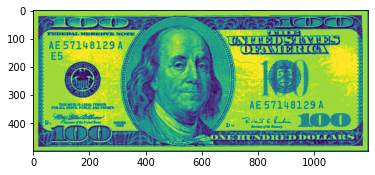

In [43]:
bit6 = reconst_bit_img(6)
rec_img876 = bit8 + bit7 + bit6
plt.imshow(rec_img876)

And now from bit8,7,6,5

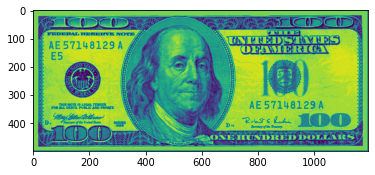

In [44]:
bit8 = reconst_bit_img(8)
bit7 = reconst_bit_img(7)
bit6 = reconst_bit_img(6)
bit5 = reconst_bit_img(5)
rec_img8765 = bit8 + bit7 + bit6 + bit5
plt.imshow(rec_img8765)

For visual difference of the reconstruction of the image from different bits

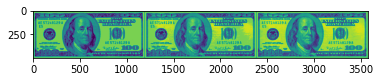

In [45]:
final_images = cv2.hconcat([rec_img87,rec_img876,rec_img8765])
plt.imshow(final_images)

Histogram Equalization:
sk = T(rk) = L-1 summation j = 0 to k (pr(rj))

pr(rk) = nk / MN where nk is the number of pixel with intenisty vlaue k and MN is the number of total pixels in image.

Steps:

1: First find the nk of the pixel
2: divide nk by MN to obatined pr(rk)
3: then use the first formula to mapp each pixel in the output image.
   Original Image

Dark Image

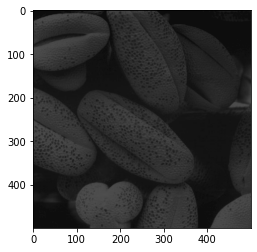

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
image=cv2.imread("Fig0316(4)(bottom_left).tif")
plt.imshow(image)

Equalized Image:

Brighter Image due to its histogram equalization

In [10]:
def hist_equal(image, L = 256):
    pixels, nk = np.unique(image, return_counts = True)
    m,n = image.shape
    mn = m*n
    pr_rk = []
    for n in nk:
      pr_rk.append(n/mn)
    cdf = []
    temp = 0
    for i,val in enumerate(pr_rk):
      temp = temp + val
      cdf.append(temp)
    summation = dict(zip(pixels, cdf))
    equalized_image = np.zeros_like(image)
    for (h,w),x in np.ndenumerate(image):
        equalized_image[h][w] = np.floor((L-1)*summation[x])
    return equalized_image
plt_imshow(hist_equal(image))

NameError: name 'plt_imshow' is not defined

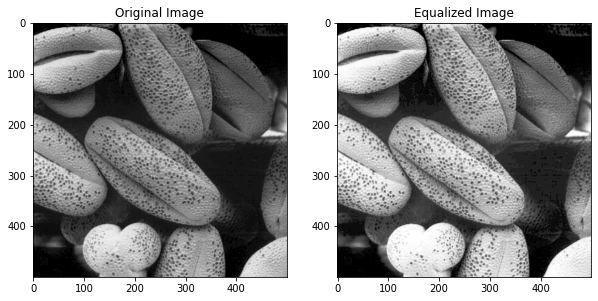

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def hist_equal(image, L=256):
    # Calculate histogram of the input image
    pixels, nk = np.unique(image, return_counts=True)
    m, n = image.shape
    mn = m * n
    
    # Calculate probability density function (pdf)
    pr_rk = nk / mn
    
    # Calculate cumulative distribution function (cdf)
    cdf = np.cumsum(pr_rk)
    
    # Create a dictionary mapping each pixel value to its corresponding cdf value
    summation = dict(zip(pixels, cdf))
    
    # Create an empty array for the equalized image
    equalized_image = np.zeros_like(image)
    
    # Perform histogram equalization pixel-wise
    for (h, w), pixel_value in np.ndenumerate(image):
        equalized_image[h][w] = np.floor((L - 1) * summation[pixel_value])
    
    return equalized_image

# Load an example image
image = cv2.imread('Fig0316(4)(bottom_left).tif', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = hist_equal(image)

# Display the original and equalized images using matplotlib (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.show()


Histogram of original and Enhanced Image

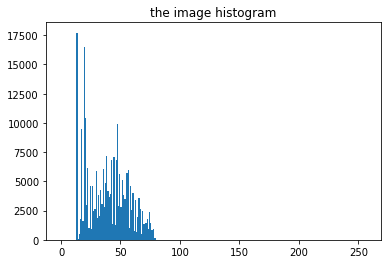

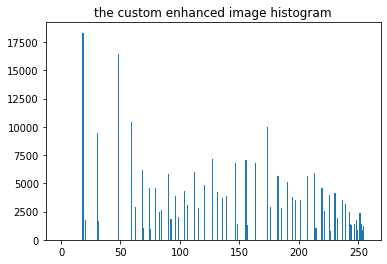

In [3]:
plt.hist(image.ravel(),256,[0,256])
plt.title('the image histogram')
plt.show()


plt.hist(hist_equal(image).ravel(),256,[0,256])
plt.title('the custom enhanced image histogram')
plt.show()

Now lets try another images and perform histogram equalization on that...

Original_Images

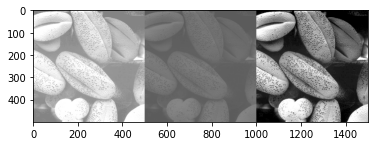

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

path1 = "Fig0320(1)(top_left).tif"
path2 = "Fig0320(2)(2nd_from_top).tif"
path3 = "Fig0320(3)(third_from_top).tif"
image1 = cv2.imread(path1)
image2 = cv2.imread(path2)
image3 = cv2.imread(path3)
plt.imshow(cv2.hconcat([image1,image2,image3]))

Now their equalized histogram according is...

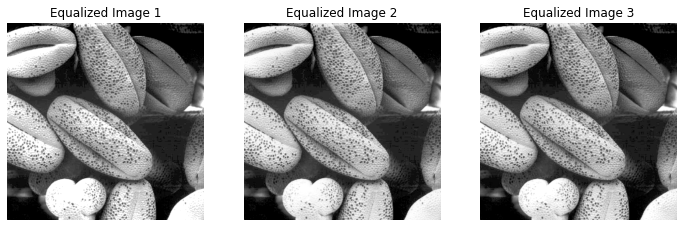

In [19]:
#Equalized image
import cv2
import matplotlib.pyplot as plt

# Define a function for histogram equalization on grayscale images
def hist_equal(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply histogram equalization
    equalized_image = cv2.equalizeHist(gray_image)
    
    return equalized_image

# Assuming image1, image2, image3 are loaded color images
# Load your images here (replace this with your image loading code)


# Apply histogram equalization to each image
equalized_image1 = hist_equal(image1)
equalized_image2 = hist_equal(image2)
equalized_image3 = hist_equal(image3)

# Display the equalized images using matplotlib
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.imshow(equalized_image1, cmap='gray')
plt.title('Equalized Image 1')
plt.axis('off')

plt.subplot(132)
plt.imshow(equalized_image2, cmap='gray')
plt.title('Equalized Image 2')
plt.axis('off')

plt.subplot(133)
plt.imshow(equalized_image3, cmap='gray')
plt.title('Equalized Image 3')
plt.axis('off')

plt.show()


and their equalized histograms are....

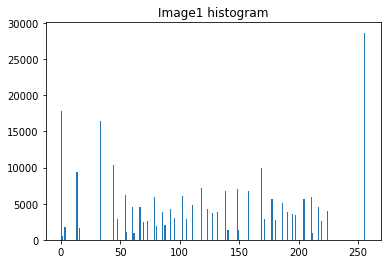

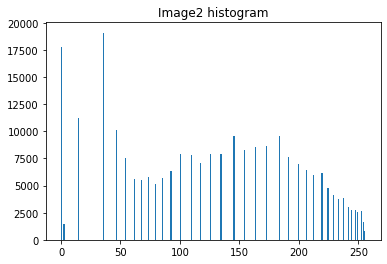

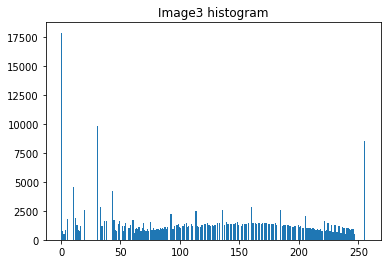

In [20]:
plt.hist(hist_equal(image1).ravel(),256,[0,256])
plt.title('Image1 histogram')
plt.show()

plt.hist(hist_equal(image2).ravel(),256,[0,256])
plt.title('Image2 histogram')
plt.show()

plt.hist(hist_equal(image3).ravel(),256,[0,256])
plt.title('Image3 histogram')
plt.show()
     


Lowpass Box Filtering:
Now to use box filtering we must remembering something,

define an m x n filter by the filter must be odd.(3x3)
all the values of the filter coefficient must be same in this case it will be 1's.
There will be a normaize constant infront of the kernal whose value will be 1 divied by the sum of the values of the coefficient of kernal. This can be 1/mn if there is only 1's value used in kernal.
For creating kernal we also specify 'a' and 'b' where a = m-1/2 and b = n-1 / m,n odd integer.

We also pad m-1 rows left and right side of the image and n-1 cols up and down side of the image

As we know that the formula used for convolution... we implement here..

w * f(x,y) = summation s = -a to and summation t = -b to b
{w(s,t) f(x-s, y-t)}

Original Image

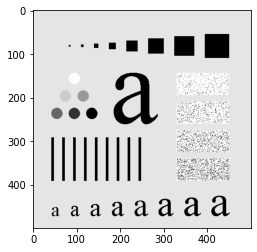

In [73]:
import cv2,numpy as np, matplotlib.pyplot as plt
original_image = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif")
plt.imshow(original_image)

Box Filtering with 3 x 3

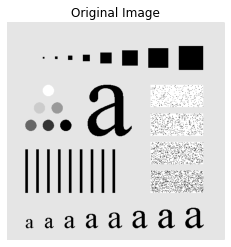

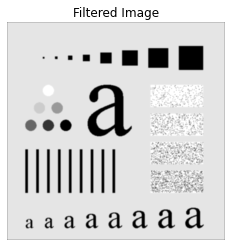

True

In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
original_image = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif", cv2.IMREAD_GRAYSCALE)
plt.imshow(original_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.show()

def box_filter(image, m):
    pad_rows = m // 2
    # Pad the image with specified rows and cols
    padded_image = np.pad(image, pad_width=pad_rows, mode='constant', constant_values=0)
    blur_image = np.zeros_like(image)
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            window = padded_image[x : x + m, y : y + m]  # Create window same as the size of the filter kernel
            value = np.sum(window)  # Sum the values in the window
            blur_image[x, y] = int(value / (m * m))  # Average the values
    return blur_image

# Apply the box filter
filtered_image = box_filter(original_image, 3)

# Display the filtered image
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')
plt.axis('off')
plt.show()

# Save the filtered image if needed
cv2.imwrite('filtered_image.png', filtered_image)


Error: Unable to load image from image.jpg


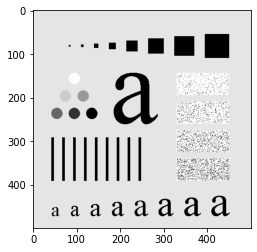

In [41]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

original_image = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif")
plt.imshow(original_image)
def box_filter(image, m):
    pad_rows = m // 2
    # Pad the image with specified rows and columns
    padded_image = np.pad(image, pad_width=pad_rows, mode='constant', constant_values=0)
    blur_image = np.zeros_like(image)
    
    for x in range(image.shape[0]):
        for y in range(image.shape[1]):
            window = padded_image[x : x + m, y : y + m]  # Create window same as the size of the filter kernel
            value = np.sum(window)  # Sum of the window
            blur_image[x, y] = int(value / (m * m))  # Averaging the sum
    return blur_image

image_path = 'image.jpg'
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if original_image is None:
    print(f"Error: Unable to load image from {image_path}")
else:
    # Apply box filter with a kernel size of 3x3
    filtered_image = box_filter(original_image, 3)

    # Display the original and filtered images
    plt.subplot(121), plt.imshow(original_image, cmap='gray')
    plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(122), plt.imshow(filtered_image, cmap='gray')
    plt.title('Filtered Image (Box Filter)'), plt.xticks([]), plt.yticks([])
    plt.show()


# Lowpass Gaussian Filtering:
Guassian filter kernel is circularly symmetric kernel mean that it is independent of the kernel orientation.

Gaussian Filter can be made with the help of the Gaussian Function discussed below...

w(s,t) = G(s,t) = Ke^ - ((s^2 + t^2)/ 2sigma^s) where K can be equal to K = 1 / 2pi * sigma^2

but here in these example we set K = 1.

Original Image:

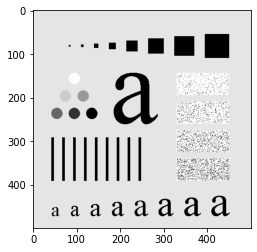

In [42]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
original_image = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif")
plt.imshow(original_image)

 No we have to apply guassian filter to the image to obtained the same result as the box filter can give us...

But for Gaussian filter we need to choose a size greater than the box filter as we know that box filter give weight same to each pixels of the image as their are identical coefficient used in box filter,the values of Gaussian kernel coefficients (and hence their effect) decreases as a function of distance from the kernel center.

Thus for a Gaussian kernel of size 21 x 21 which is the size of the kernal to obtained the result as same for box filter of size 21x21 and hence we use sigma = 3.5.

Blur Image with Gaussian filter Size 21 x 21 sigma = 3.5

Convolution Section

In [77]:
def convolution(image, kernel, average=False):
    image_row, image_col = image.shape
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    pad_height = (kernel_row - 1) // 2
    pad_width = (kernel_col - 1) // 2

    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])
            if average:
                output[row, col] /= kernel.shape[0] * kernel.shape[1]

    return output

Guassian Kernal Section

In [78]:
def dnorm(x, mu, sd):
    return 1 / (np.sqrt(2 * np.pi) * sd) * np.e ** (-np.power((x - mu) / sd, 2) / 2)


def gaussian_kernel(size, sigma=1):
    kernel_1D = np.linspace(-(size // 2), size // 2, size)
    for i in range(size):
        kernel_1D[i] = dnorm(kernel_1D[i], 0, sigma)
    kernel_2D = np.outer(kernel_1D.T, kernel_1D.T)

    kernel_2D *= 1.0 / kernel_2D.max()

    return kernel_2D

Guassian Blur Section:

Make a Guassian blur function to perform guassian blurring with the help of the above functions defined

In [50]:
import math
def gaussian_blur(image, kernel_size, sigma, is_show = False):
    kernel = gaussian_kernel(kernel_size, sigma=sigma)
    blur_image = convolution(image, kernel, average=True,)
    if is_show:
      plt.figure(figsize= (20,30))
      plt.subplot(1,3,1)
      plt.title(f"Kernal{kernel_size} x {kernel_size}")
      plt.imshow(kernel, cmap='gray')
      plt.axis('off')

      plt.subplot(1,3,2)
      plt.title('Original Image')
      plt.imshow(original_image, cmap='gray')
      plt.axis('off')

      plt.subplot(1,3,3)
      plt.title('Blurred Image')
      plt.imshow(blur_image, cmap='gray')
      plt.axis('off')
    else:
      return blur_image


Gaussian Blurr using kernel 21 x 21 with sigma 3.5

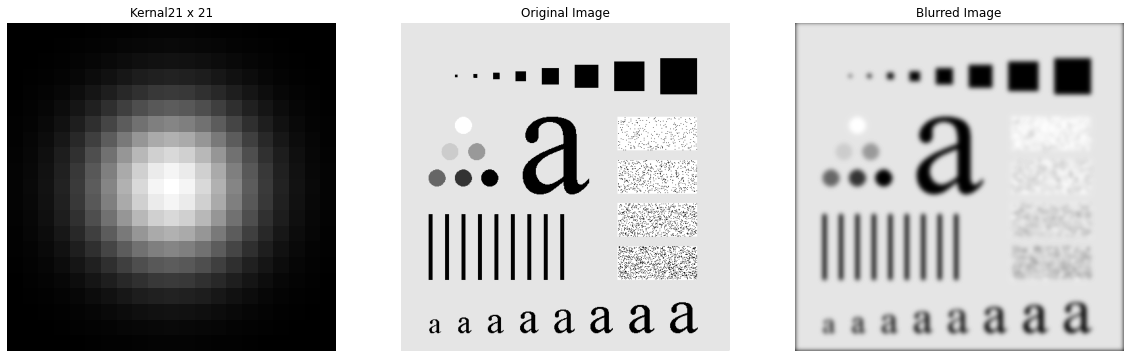

In [79]:
kernel_size = 21
sigma = 3.5
gaussian_blur(original_image, kernel_size, sigma, is_show = True)
     

Now from the above resultant image we conclude that the gaussian filter with
size same for box filter i. 21x21 gives less blurred result than box filter.
A little experimentation would show that we need a simga = 7 
to achieve the result so to get the nearest odd integer size kernal . 6 * sigma => 6 * 7 ,
so we need a gaussian kernal of size 43 x 43... as 6 * 7 = 42
so we will git the odd integer size i.e 43 ... but why not 41... 
as there is ceil use like ceil(6 * sigma) so this is why we will choose greater integer.

Blur Image with Gaussain filter size 43 x 43 and simga = 7

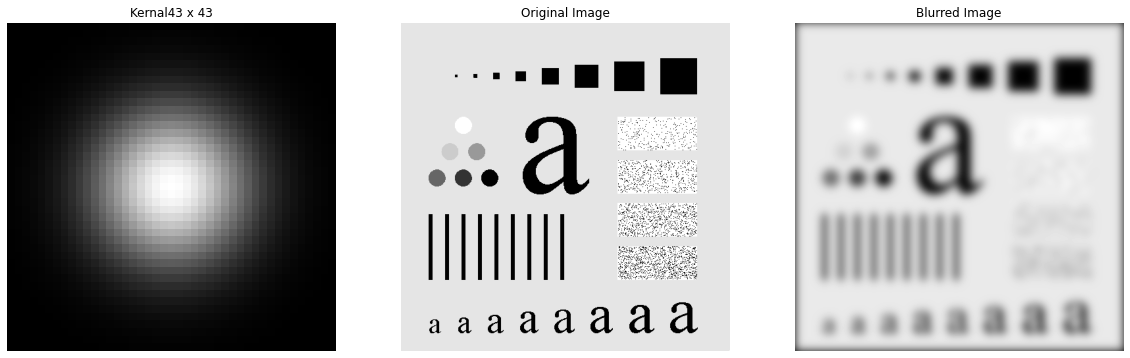

In [80]:
kernel_size = 43
sigma = 7
gaussian_blur(original_image, kernel_size, sigma, is_show = True)

There will no much difference if we use the kernal size greater than ceil(6 * simga). To demonstrate this, we will choose a guassian kernal;

1: size = 85 x 85
2: sigma = 7
and we will compare to result gained from the gaussian kernel size 43 x 43 with sigma = 7.

Blur Image with Gaussian kernel size 85 x 85 with sigma 7

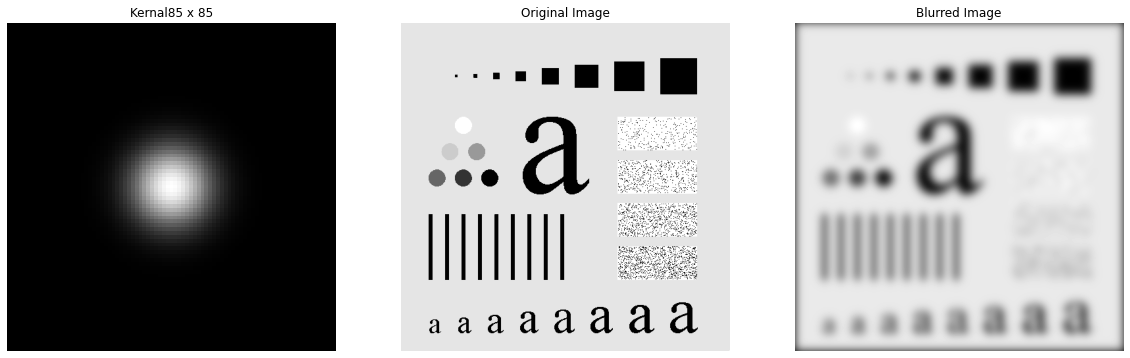

In [81]:
kernel_size = 85
sigma = 7
gaussian_blur(original_image,kernel_size,sigma, is_show = True)

As you can see there is no additional blurring in the resultant image than a blur image with gaussain kernel size 43 with sigma 7. If you want to see the differnece let subtract the the 43 x 43 gaussian blur image from 85 x 85 gaussian blur image.

Subract Image

(-0.5, 499.5, 499.5, -0.5)

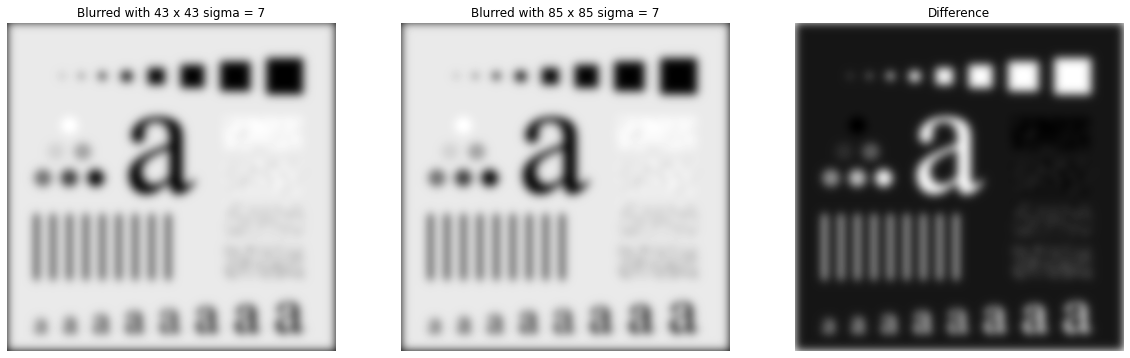

In [82]:
blurred_43 = gaussian_blur(original_image, 43, 7)
blurred_85 = gaussian_blur(original_image, 85, 7)
difference = np.subtract(blurred_85, blurred_43)

plt.figure(figsize= (20,20))
plt.subplot(1,3,1)
plt.title('Blurred with 43 x 43 sigma = 7')
plt.imshow(blurred_43, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Blurred with 85 x 85 sigma = 7')
plt.imshow(blurred_85, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Difference')
plt.imshow(difference, cmap ='gray')
plt.axis('off')

It will give the dark result but there is slight problem as i have adjust the shape of the two image because these were not broadcatable. and by changing the shape of the images so the pixels valuse move from its position like when at index [50,50] intensity is 100, now after the shape changing the intensity at the same index i.e [50,50] is like 50. So if we subract 50 from 100 we get the result 50 which is quiet gray. But we want result 0. And this is possible and we will cover next soon.

# Comparison of Box and Gausian filter smoothing Characteristics

(-0.5, 209.5, 208.5, -0.5)

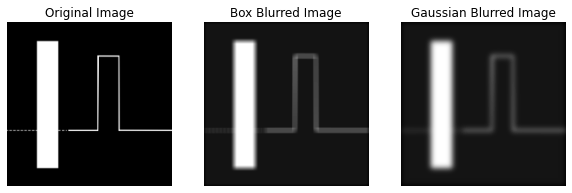

In [96]:
import numpy as np, matplotlib.pyplot as plt, cv2
original_image = cv2.imread('Screenshot 2024-02-08 220527.png', cv2.IMREAD_REDUCED_GRAYSCALE_2)
blurred_with_box = box_filter(original_image,7)
blurred_with_gaussian = gaussian_blur(original_image,21,3.4)

plt.figure(figsize = (10,20))
plt.subplot(1,3,1)
plt.imshow(original_image, cmap = 'gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(blurred_with_box, cmap = 'gray')
plt.title('Box Blurred Image')
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(blurred_with_gaussian, cmap = 'gray')
plt.title('Gaussian Blurred Image')
plt.axis('off')

 As you can see clearly in the above figure that the image which is smooth with box filter have less smooth conrner around the rectangle while the image soothen with gaussian filter has much smoth corner around the ractangle. So if we need less smoothing around the edge we will use box filtering and guassian filter in opposite.

Note fig.2 has 7x7 box filter used while fig.3 has a gaussian kernel of size 21x21 with sigma 3.4

# Zeros Padding, Mirror Padding and Replicate Padding Zero Padding:

# Zero padding:
is used when we arenot interested in the edge of the image. And the resultant image boarder will be dark as there will be zeros intensity valuse rows and coloums.


# Mirror Padding:

Mirror Padding is used when values at new padded rows and coloumns are the mirror reflect of the image across boarders. Mirror padding is more applicable when the areas near the border contain image details.

 # Replicate Padding:

Replicate Padding is used when in which values outside the boundary are set equal to the nearest image border value. It is useful when we kept the boarder of the image constant.

First we will create a function for apply guassian function and one of the argument will be padding mode. On the basis of this argument we will apply on of these padding types.

In [106]:
def gaussian_kernel(size,sigma):
    K = 1
    kernel = np.fromfunction(lambda x, y: K * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)),(size, size))
    # as there x and y values will go from 0 to size -1.
    normalized_kernal = (1/np.sum(kernel)) * kernel
    return normalized_kernal

def zero_padding(image, kernel_size):
    image_row, image_col = image.shape
    pad_height = (kernel_size - 1) // 2
    pad_width = (kernel_size - 1) // 2
    padded_image = np.zeros((image_row + (2 * pad_height), image_col + (2 * pad_width)))
    padded_image[pad_height:padded_image.shape[0] - pad_height, pad_width:padded_image.shape[1] - pad_width] = image
    return padded_image

def mirror_padding(image, kernel_size):
    pad_rows = (kernel_size - 1) // 2
    pad_cols = (kernel_size - 1) // 2
    padded_image = np.pad(image,((pad_rows, pad_rows), (pad_cols, pad_cols)), mode = 'reflect')
    return padded_image

def replicate_padding(image, kernel_size):
    pad_rows = (kernel_size - 1) // 2
    pad_cols = (kernel_size - 1) // 2
    padded_image = np.pad(image,((pad_rows, pad_rows), (pad_cols, pad_cols)), mode = 'edge')
    return padded_image

def gaussian_filter(image, kernel_size, sigma , mode):
    image_row, image_col = image.shape
    kernel = gaussian_kernel(kernel_size,sigma)
    kernel_row, kernel_col = kernel.shape

    output = np.zeros(image.shape)

    if mode == 'zero':
      padded_image = zero_padding(image,kernel_size)
    elif mode =='mirror':
      padded_image = mirror_padding(image, kernel_size)
    else:
      padded_image = replicate_padding(image,kernel_size)

    for row in range(image_row):
        for col in range(image_col):
            output[row, col] = np.sum(kernel * padded_image[row:row + kernel_row, col:col + kernel_col])

    return output

Note that we will use the same image used above but the guassian kernel will be different as the size will be 187 x 187 and the sigma value will be 31.

Let try first for Zero padding.

# Zero Padding:

In [107]:
original_image = cv2.imread("Fig0333(a)(test_pattern_blurring_orig).tif")
plt.imshow(gaussian_filter(original_image,187,31,'zero'))
#gaussian_blur(original_image, 187, 31,is_show = True)

ValueError: too many values to unpack (expected 2)

Now try for mirror padding

Mirror Padding:

In [95]:
plt.imshow(gaussian_filter(original_image, 187, 31, 'mirror'))

ValueError: too many values to unpack (expected 2)

And finally try for replicate padding

Replicate Padding

In [ ]:
plt.imshow(gaussian_filter(original_image, 187, 31, 'replicate'))

# Order Statistics (Non-Linear) Filters
1: Median Filter
3: Max Filter
3: Min Filter
We will do example on median filtering and compare with linear filtering i.e Gaussian Filter

(-0.5, 454.5, 439.5, -0.5)

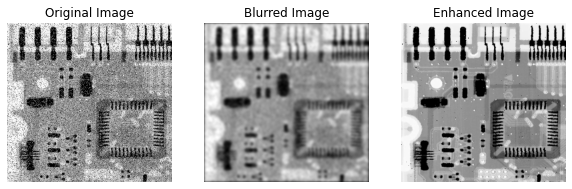

In [109]:
import numpy as np, matplotlib.pyplot as plt, cv2
original_image = cv2.imread("Fig0335(a)(ckt_board_saltpep_prob_pt05).tif", cv2.IMREAD_GRAYSCALE)

# Median Filtering
def median_filter(image,kernel_size):
  image_rows,image_cols = image.shape
  pad_rows = (kernel_size-1) // 2
  pad_cols = (kernel_size-1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode='reflect')
  output = np.zeros_like(image)

  for row in range(image_rows):
    for col in range(image_cols):
      neighbours = padded_image[row : row + kernel_size, col : col + kernel_size]
      median_val = np.median(np.ravel(neighbours))
      output[row,col] = median_val

  return output

plt.figure(figsize = (10,20))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(original_image, cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title('Blurred Image')
plt.imshow(gaussian_blur(original_image,21,3.4), cmap = 'gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title('Enhanced Image')
plt.imshow(median_filter(original_image,3), cmap = 'gray')
plt.axis('off')

# Sharpening (Highpass) Spatial Filters
USING THE SECOND DERIVATIVE FOR IMAGE SHARPENING—THE LAPLACIAN.

Equation for Laplacian Kernel.

∇^2f(x,y)=f(x+1,y)+f(x−1,y)+f(x,y+1)+f(x,y−1)−4f(x,y).

We will implement this equation with the following kernels i.e

0 1 0 ...... 1 1 1

1 -4 1 ...... 1 -8 1

0 1 0 ...... 1 1 1

(-0.5, 465.5, 539.5, -0.5)

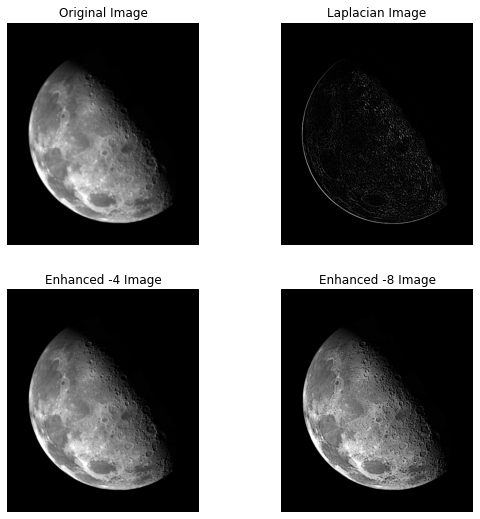

In [8]:
import numpy as np, matplotlib.pyplot as plt, cv2
original_image = cv2.imread('Fig0338(a)(blurry_moon).tif',cv2.IMREAD_GRAYSCALE)

def laplacian_sharp(image,kernel):
  image_rows,image_cols = image.shape
  kernel_rows,kernel_cols = kernel.shape

  pad_rows = (kernel_rows - 1) // 2
  pad_cols = (kernel_cols - 1) // 2

  padded_image = np.pad(image, ((pad_rows,pad_rows),(pad_cols,pad_cols)),mode = 'reflect')

  output_image = np.zeros_like(image)
  for row in range(image_rows):
    for col in range(image_cols):
      val = np.sum(kernel * padded_image[row : row + kernel_rows, col : col + kernel_cols])
      output_image[row,col] = 0 if val < 0  else val

  return output_image

# create a kernel that implements the above formula for Laplacian Function
laplacian_kernel1 = np.array([[0,1,0],[1,-4,1],[0,1,0]])
laplacian_kernel2 = np.array([[1,1,1],[1,-8,1],[1,1,1]])
c = -1
result1 = laplacian_sharp(original_image,laplacian_kernel1)
result2 = laplacian_sharp(original_image,laplacian_kernel2)
enhanced_image1 = np.where((original_image + (c * result1) < 0),0,original_image + (c * result1))
enhanced_image2 = np.where((original_image + (c * result2) < 0),0,original_image + (c * result2))

plt.figure(figsize= (9,9))
plt.subplot(2,2,1)
plt.title('Original Image')
plt.imshow(original_image, cmap ='gray')
plt.axis('off')

plt.subplot(2,2,2)
plt.title('Laplacian Image')
plt.imshow(result1, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,3)
plt.title('Enhanced -4 Image')
plt.imshow(enhanced_image1, cmap = 'gray')
plt.axis('off')

plt.subplot(2,2,4)
plt.title('Enhanced -8 Image')
plt.imshow(enhanced_image2, cmap = 'gray')
plt.axis('off')

And if we want to scale the laplacian image to visualized it more perfectly we can use the following formulas for this...

gm = g - min(g)

which creates an image whose minimum value is 0 as by using some of the values will be less than 0, then we perform the operation i.e

gs = K [ gm / max(gm) ]

which creates a scale image whose values are in range [0,255] as K = 8 for 8-bit image.

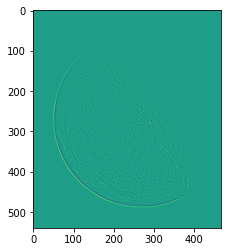

In [9]:
def laplacian_filter(image,kernel):
  image_rows,image_cols = image.shape
  kernel_rows,kernel_cols = kernel.shape
  pad_rows = (kernel_rows -1) // 2
  pad_cols = (kernel_cols -1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode= 'reflect')
  output_image = np.zeros_like(image,dtype = np.int64)
  for row in range(image_rows):
    for col in range(image_cols):
      output_image[row,col] = np.sum(kernel * padded_image[row : row + kernel_rows, col : col + kernel_cols])
  output_image2 = output_image - np.min(output_image)
  output_image = (output_image2 / np.max(output_image2)) * 255
  return output_image

lap_kernel = np.array([[0,1,0],[1,-4,1],[0,1,0]])
lap_image = laplacian_filter(original_image,lap_kernel)
plt.imshow(lap_image)
     

# UNSHARP MASKING AND HIGHBOOST FILTERING
Subtracting an unsharp (smoothed) version of an image from the original image is process that has been used since the 1930s by the printing and publishing industry to sharpen images. This process, called unsharp masking, consists of the following steps:

Blur the original image.
Subtract the blur image from the original (the resulting difference is called mask)
Add the mask to the original image.
letting b(x,y) denote the blur image, the mask in equation form is given as;

gmask(x,y) = f(x,y) - b(x,y)

Then we add a weighted portion of the mask back to the original image,

g(x,y) = f(x,y) + k * gmask(x,y)

where we include a weight, k(k>=0) for generality

1: when k = 1, we have unsharp masking as define above
2: when k > 1, the process is called highboost filtering
3: when k < 1, reduced the contrbution of the unsharp mask.
# Unsharp masking and highboost filtering example

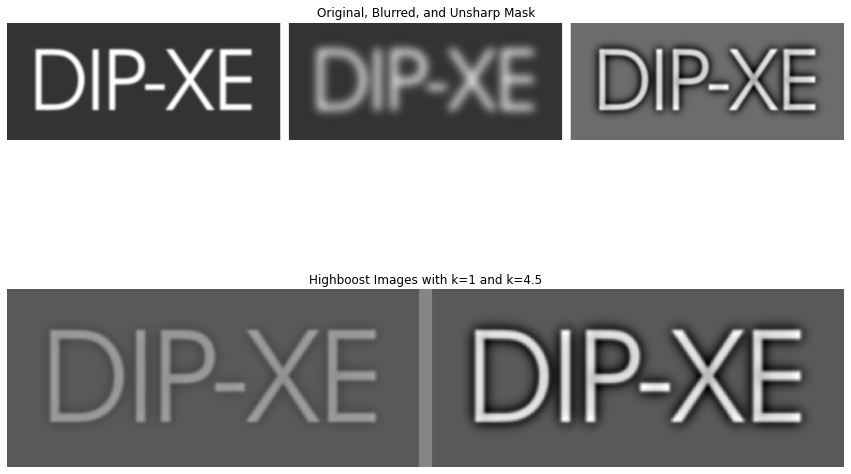

In [17]:
import cv2
import numpy as np
from scipy.ndimage import gaussian_filter
import matplotlib.pyplot as plt

# Load the original image in grayscale
original_image = cv2.imread('Fig0340(a)(dipxe_text).tif', cv2.IMREAD_GRAYSCALE)
original_image = original_image.astype(np.float64)

# Apply Gaussian blur to the original image
blurred_image = gaussian_filter(original_image, sigma=5, mode='mirror')

# Create the unsharp mask
unsharp_mask = original_image - blurred_image
unsharp_mask1 = unsharp_mask - np.min(unsharp_mask)

# Normalize the unsharp mask
unsharp_mask1 = 255 * (unsharp_mask1 / np.max(unsharp_mask1))

# Apply highboost filtering with different k values
k1 = 1
sharp_image1 = original_image + (k1 * unsharp_mask)

k2 = 4.5
sharp_image2 = original_image + (k2 * unsharp_mask)

# Define the separator width and create a separator image
separator_width = 10  # Adjust as needed
separator = np.ones((original_image.shape[0], separator_width), dtype=np.float64) * 255

# Concatenate images for display
concat1 = cv2.hconcat([original_image, separator, blurred_image, separator, unsharp_mask1])
concat2 = cv2.hconcat([sharp_image1, separator, sharp_image2])

# Plot the images
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.title('Original, Blurred, and Unsharp Mask')
plt.imshow(concat1, cmap='gray')
plt.axis('off')

plt.subplot(2, 1, 2)
plt.title('Highboost Images with k=1 and k=4.5')
plt.imshow(concat2, cmap='gray')
plt.axis('off')

plt.show()


USING FIRST-ORDER DERIVATIVES FOR IMAGE SHARPENING—THE GRADIENT

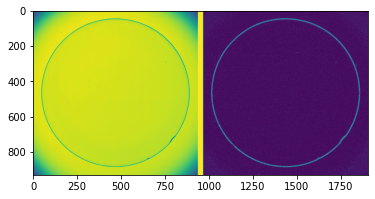

In [25]:
def gradient_filter(image,kernel_x,kernel_y):
  img_rows,img_cols = image.shape
  k_x_rows,k_x_cols = kernel_x.shape
  k_y_rows,k_y_cols= kernel_y.shape
  pad_rows = (k_x_rows - 1) // 2
  pad_cols = (k_x_cols - 1) // 2
  padded_image = np.pad(image,((pad_rows,pad_rows),(pad_cols,pad_cols)),mode = 'reflect')
  output_image = np.zeros_like(image)

  for row in range(img_rows):
    for col in range(img_cols):
      gx = np.sum(kernel_x * padded_image[row : row + k_x_rows, col : col + k_x_cols])
      gy = np.sum(kernel_y * padded_image[row : row + k_y_rows, col : col + k_y_cols])
      output_image[row,col] = np.sqrt(np.power(gx,2)+np.power(gy,2))
  return output_image
original_image = cv2.imread('Fig0342(a)(contact_lens_original).tif',cv2.IMREAD_GRAYSCALE)
gradient_x_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
gradient_y_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sharp_image = gradient_filter(original_image,gradient_x_kernel,gradient_y_kernel)
separator_width = 30  # Adjust as needed
separator = np.ones((original_image.shape[0], separator_width), dtype=original_image.dtype) * 255
plt.imshow(cv2.hconcat([original_image,separator,sharp_image]))
     

# COMBINING SPATIAL ENHANCEMENT METHODS
We will use the following image enhancement methods in our following code.

1: Laplacian Filter
2: Gradieant Filter
3: Box Filter on Gradient
4: Multiplication of Laplacian and Blurred Gradient
5: Adddition Original and Result from the multiplication of Laplacian and Blurred Gradiend.
6: Power Law (Gamma) tranformation function

<ipython-input-30-f35d9cdb5e68>:72: RuntimeWarning: invalid value encountered in sqrt
  enhanced_image = c * ((sharp_image / 255) ** gamma)


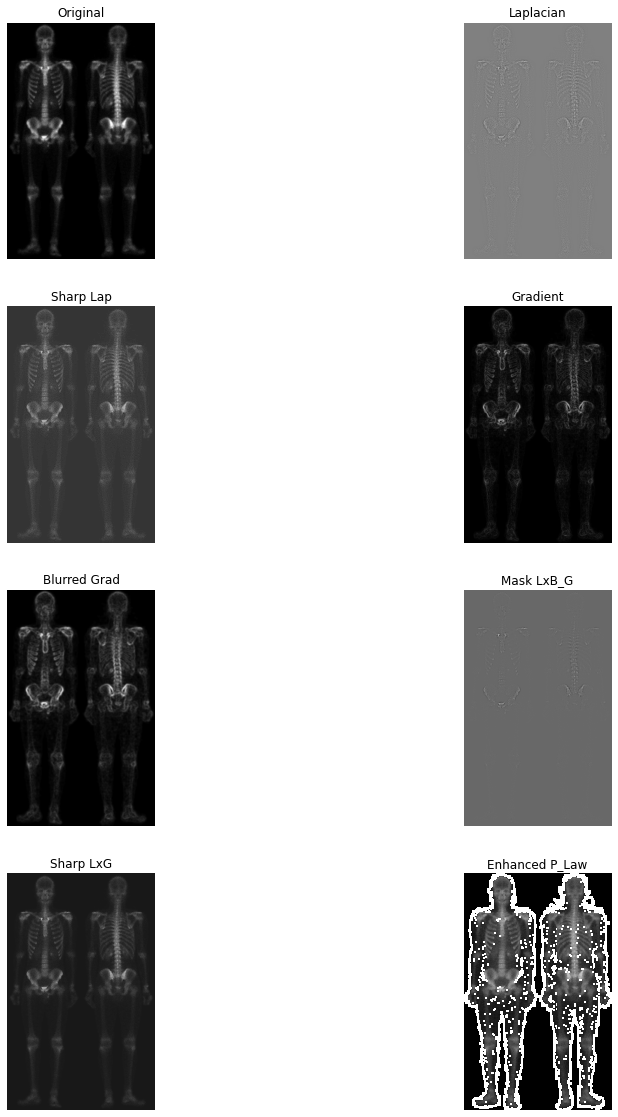

In [30]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Laplacian filter function
def laplacian_filter(image, kernel):
    image_rows, image_cols = image.shape
    kernel_rows, kernel_cols = kernel.shape
    pad_rows = (kernel_rows - 1) // 2
    pad_cols = (kernel_cols - 1) // 2
    padded_image = np.pad(image, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='reflect')
    output_image = np.zeros_like(image, dtype=np.int64)
    for row in range(image_rows):
        for col in range(image_cols):
            output_image[row, col] = np.sum(kernel * padded_image[row: row + kernel_rows, col: col + kernel_cols])
    return output_image

# Image scaling function
def image_scale(image):
    image2 = image - np.min(image)
    image = 255 * (image2 / np.max(image2))
    return image

# Gradient filter function
def gradient_filter(image, kernel_x, kernel_y):
    grad_x = laplacian_filter(image, kernel_x)
    grad_y = laplacian_filter(image, kernel_y)
    grad_image = np.sqrt(grad_x ** 2 + grad_y ** 2)
    return grad_image

# Box filter function
def box_filter(image, size):
    kernel = np.ones((size, size), dtype=np.float64) / (size * size)
    return cv2.filter2D(image, -1, kernel)

# Load the original image in grayscale
original_image = cv2.imread('Fig0343(a)(skeleton_orig).tif', cv2.IMREAD_GRAYSCALE)
original_image = original_image.astype(np.float64)

# Laplacian filter kernel
laplacian_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])

# Apply Laplacian filter
lap_image = laplacian_filter(original_image, laplacian_kernel)
lap_vis = image_scale(lap_image)

# Sharpness with only Laplacian
c = 1
lap_sharp_img = original_image + (c * lap_image)

# Gradient filter kernels
gradient_x_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
gradient_y_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Apply Gradient filter
grad_image = gradient_filter(original_image, gradient_x_kernel, gradient_y_kernel)

# Blur the gradient image with a box filter (5x5)
blurred_gradient = box_filter(grad_image, 5)

# Multiply Blurred Gradient with Laplacian Image
scaled_lap_image = lap_image / 255
scaled_blurred_gradient = blurred_gradient / 255
mask_image = (scaled_lap_image * scaled_blurred_gradient) * 255

# Add the resulting mask to the original image
sharp_image = original_image + mask_image

# Power Law Transformation function
gamma = 0.5
c = 255
enhanced_image = c * ((sharp_image / 255) ** gamma)

# Function to show images
def show(images, titles):
    plt.figure(figsize=(15, 20))
    for i in range(len(images)):
        plt.subplot(4, 2, i + 1)
        plt.title(titles[i])
        plt.imshow(images[i], cmap='gray')
        plt.axis('off')
    plt.show()

# Prepare images and titles for display
images = [original_image, lap_vis, lap_sharp_img, grad_image, blurred_gradient, mask_image, sharp_image, enhanced_image]
titles = ['Original', 'Laplacian', 'Sharp Lap', 'Gradient', 'Blurred Grad', 'Mask LxB_G', 'Sharp LxG', 'Enhanced P_Law']

# Show the images
show(images, titles)
